In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [82]:
df=pd.read_csv("/content/housing.csv")


In [81]:
df.head(100)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY
96,-122.26,37.82,31.0,4596.0,1331.0,2048.0,1180.0,2.8345,183800.0,NEAR BAY
97,-122.26,37.81,29.0,335.0,107.0,202.0,91.0,2.0062,125000.0,NEAR BAY
98,-122.26,37.82,22.0,3682.0,1270.0,2024.0,1250.0,1.2185,170000.0,NEAR BAY


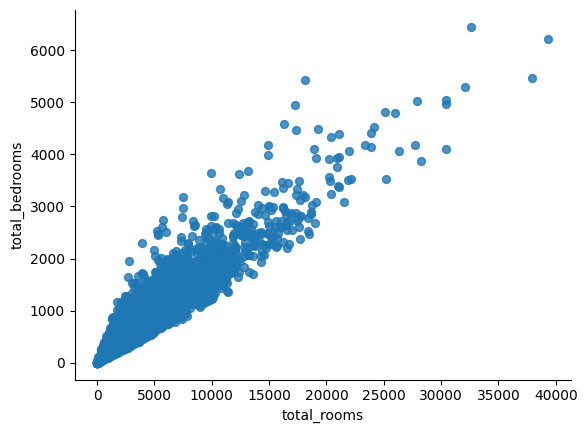

In [83]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='total_rooms', y='total_bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: ylabel='count'>

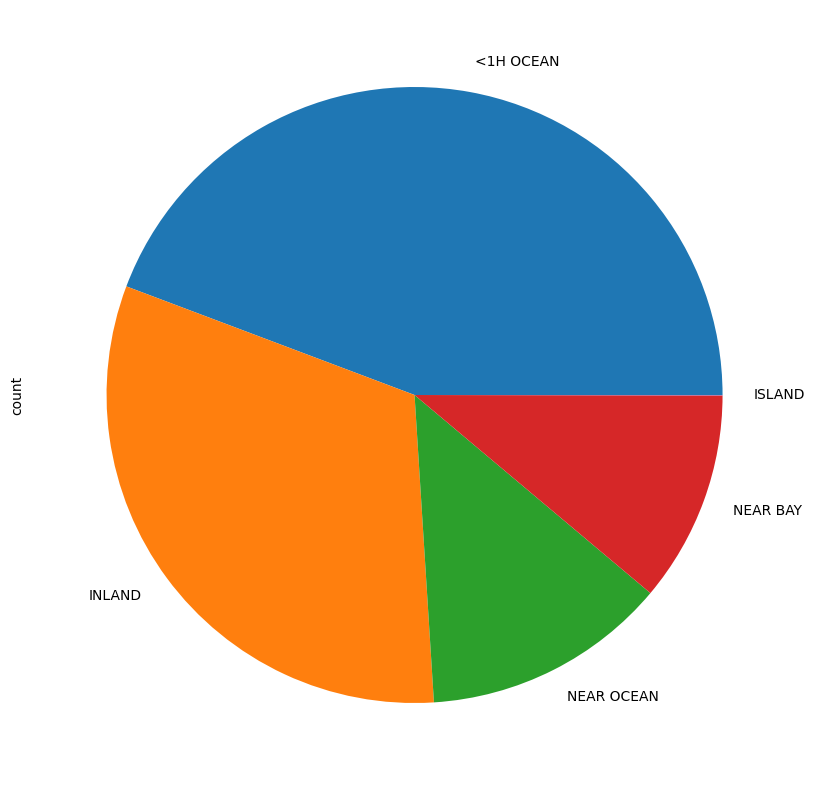

In [84]:
df['ocean_proximity'].value_counts().plot(kind='pie', figsize=(20,10))

In [85]:
map={'<1H OCEAN':1 ,'INLAND' : 2 ,'NEAR OCEAN' : 3, 'NEAR BAY': 4 , 'ISLAND':5}
df['ocean_proximity']=df['ocean_proximity'].map(map)

<Axes: >

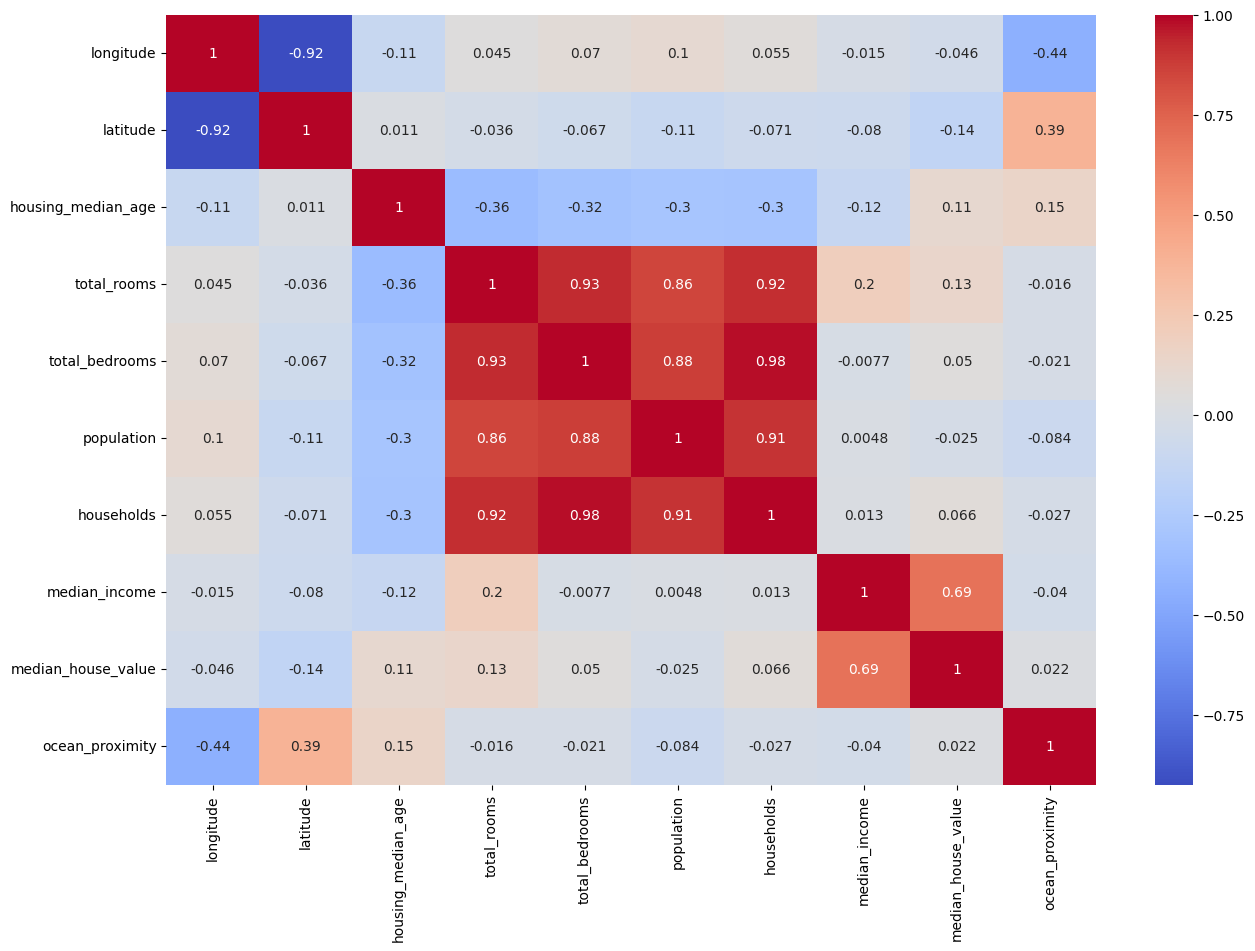

In [86]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

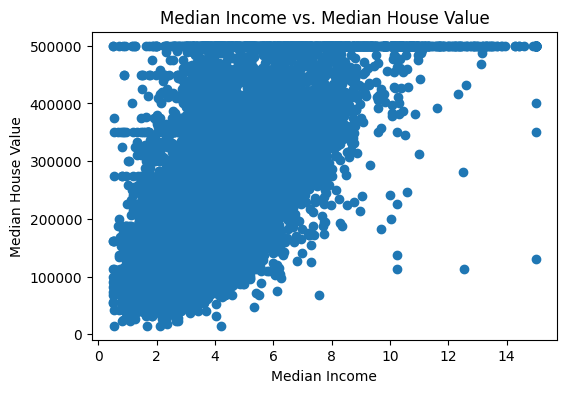

In [89]:
plt.figure(figsize=(6, 4))
plt.scatter(df['median_income'], df['median_house_value'])
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income vs. Median House Value')
plt.show()

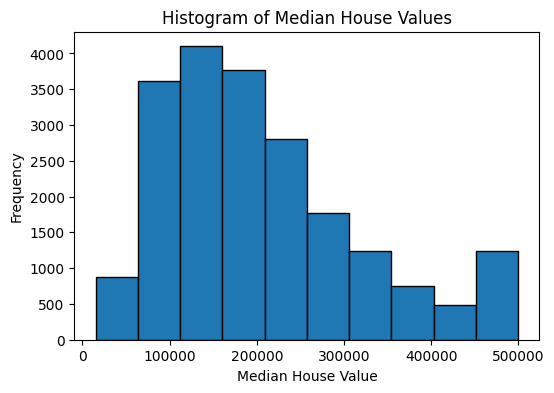

In [90]:
plt.figure(figsize=(6, 4))
plt.hist(df['median_house_value'],bins= 10,edgecolor='black')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Histogram of Median House Values')
plt.show()


In [91]:
df = df.dropna()

In [92]:
x=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [100]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [101]:
y_predic=model.predict(x_test)

In [102]:
mse = mean_squared_error(y_test, y_predic)
r2 = r2_score(y_test, y_predic)

In [103]:
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

In [104]:
print("Train Score (R-squared):", train_score)
print("Test Score (R-squared):", test_score)

Train Score (R-squared): 0.6389738743502356
Test Score (R-squared): 0.6261503110034747


In [106]:
print("mean squared error : ", mse)

mean squared error :  4924115657.118495
